<a href="https://colab.research.google.com/github/Ibitoye-Oyinloye/Ibitoye-Oyinloye/blob/main/Ibitoye_Handling_Missing_Values_and_Performance_Evaluation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris-Vehicle--Case-Study-Missing-Values
Shuffle list,missing data and loc data
Missing treatments "

The strategy to deal with missing values varies with the problem at hand, the data provided, and other factors too. Some of the common strategies are listed below.
### 	Drop the missing values
### Impute the missing values
## Using central tendency measures (mean, median, mode) of a column 
#### With mean: Missing values are imputed with the mean of the column. Preferred for continuous data with no outliers
#### 	With median: Missing values are imputed with the median of the column. Preferred for continuous data with outliers
#### With mode: Missing values are imputed with the mode of the column. Preferred for categorical data
### 	Using central tendency measures (mean, median, mode) of a column grouped by categories of a categorical column: Preferred for cases where the data under similar categories of a categorical column are likely to have similar properties

## Mean
## Median
## FFill
## Bfill
## Interpolation

### Import the necessary Libraries

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import io
import os
import sys

### Read the Data Set

In [ ]:
# Use Local drives to upload the excel on google colab
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (1).csv


In [ ]:
data=pd.read_csv(io.BytesIO(uploaded['iris.csv']))
data.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,class
41,4.5,2.3,1.3,0.3,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
100,6.3,3.3,6.0,2.5,Iris-virginica


In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,NaN,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.shape

(150, 5)

### Slicing the rows

In [ ]:
data.loc[10:21]

,sepal_length,sepal_width,petal_length,petal_width,class
10,5.4,3.7,1.5,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
12,4.8,3.0,1.4,NaN,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa


In [ ]:
data.loc[10]

sepal_length            5.4
sepal_width             3.7
petal_length            1.5
petal_width             0.2
class           Iris-setosa
Name: 10, dtype: object

In [ ]:
data[["petal_width","class"]].head(10)

,petal_width,class
0,0.2,Iris-setosa
1,0.2,Iris-setosa
2,0.2,Iris-setosa
3,0.2,Iris-setosa
4,0.2,Iris-setosa
5,0.4,Iris-setosa
6,0.3,Iris-setosa
7,0.2,Iris-setosa
8,0.2,Iris-setosa
9,0.1,Iris-setosa


In [ ]:
data.petal_width

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [ ]:
# data["column_name"].sum() 
  
sum_data = data['sepal_length'].sum() 
mean_data = data['sepal_length'].mean() 
median_data = data['sepal_length'].median() 
mode_data = data['sepal_length'].mode() 
  
print("Sum:",sum_data, "\nMean:", mean_data, "\nMedian:",median_data, "\nMode:",mode_data) 

Sum: 863.8 
Mean: 5.8364864864864865 
Median: 5.8 
Mode: 0    5.0
dtype: float64


## Handling of Missing Values

In [ ]:
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
petal_length,4,0.026667
sepal_width,3,0.020000
sepal_length,2,0.013333
petal_width,2,0.013333
class,0,0.000000


In [ ]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


sepal_length    5.836486
sepal_width     3.056463
petal_length    3.748630
petal_width     1.205405
dtype: float64

In [ ]:
df1= data.copy

# Replace ALL missing values with mean

In [ ]:
# Replace ALL missing values with mean
df1 = data.fillna(data.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
df1.loc[10:21]

,sepal_length,sepal_width,petal_length,petal_width,class
10,5.4,3.7,1.5,0.200000,Iris-setosa
11,4.8,3.4,1.6,0.200000,Iris-setosa
12,4.8,3.0,1.4,1.205405,Iris-setosa
13,4.3,3.0,1.1,0.100000,Iris-setosa
14,5.8,4.0,1.2,0.200000,Iris-setosa
15,5.7,4.4,1.5,0.400000,Iris-setosa
16,5.4,3.9,1.3,0.400000,Iris-setosa
17,5.1,3.5,1.4,0.300000,Iris-setosa
18,5.7,3.8,1.7,0.300000,Iris-setosa
19,5.1,3.8,1.5,0.300000,Iris-setosa


In [ ]:
df1['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# Print first 5 index values and last 5 index values
index_list = list(df1.index)
print(index_list[:5])
print(index_list[-5:])

[0, 1, 2, 3, 4]
[145, 146, 147, 148, 149]


In [ ]:
# Randomize a list
np.random.seed(5)
np.random.shuffle(index_list)

In [ ]:
print('Shuffled list')
print(index_list[:5])
print(index_list[-5:])

Shuffled list
[82, 134, 114, 42, 109]
[8, 73, 144, 118, 99]


In [ ]:
# Dataframe is now shuffled
df1 = df1.iloc[index_list]

In [ ]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,class
82,5.8,2.7,3.9,1.2,Iris-versicolor
134,6.1,2.6,5.6,1.4,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
42,4.4,3.2,1.3,0.2,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica


In [ ]:
df1.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [ ]:
data.isnull().sum()

sepal_length    2
sepal_width     3
petal_length    4
petal_width     2
class           0
dtype: int64

In [ ]:
data.isna().sum()

sepal_length    2
sepal_width     3
petal_length    4
petal_width     2
class           0
dtype: int64

In [ ]:
df2 = data.copy()

In [ ]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1. Drop All the values

In [ ]:
# Remove NaN values
df2.dropna()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


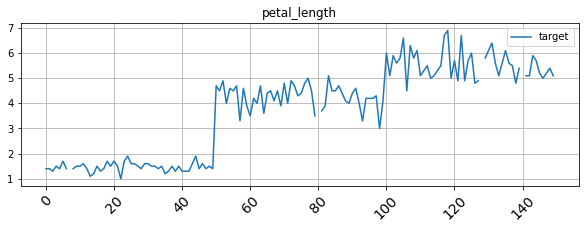

In [ ]:
# Let's visualize vehicles data
# How does missing data show up?
plt.figure(figsize=(10,3))
plt.title('petal_length')
plt.plot(data['petal_length'], label='target')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

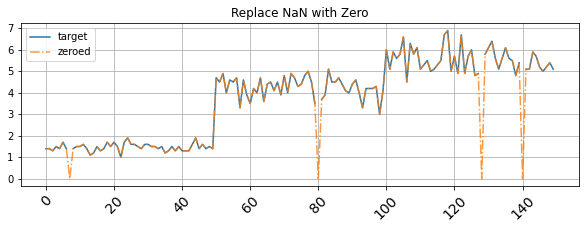

In [ ]:
# Replace missing values with zero

plt.figure(figsize=(10,3))
plt.title('Replace NaN with Zero')
plt.plot(data['petal_length'], label='target')

# fillna to replace NaNs with provided value
vehicles = data['petal_length'].fillna(0)

plt.plot(vehicles,ls='-.',alpha=0.8,label='zeroed')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

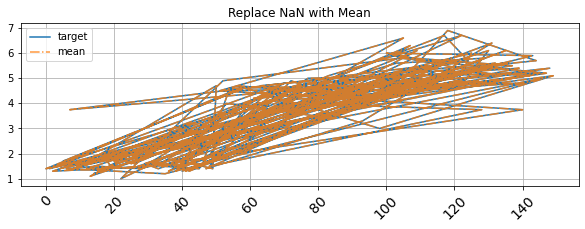

In [ ]:
# Replace missing values with mean value for that attribute
plt.figure(figsize=(10,3))
plt.title('Replace NaN with Mean')
plt.plot(df1['petal_length'], label='target')

# fillna to replace NaNs with provided value
vehicles = df1['petal_length'].fillna(df1['petal_length'].mean())

plt.plot(vehicles,ls='-.',alpha=0.8,label='mean')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

### Replace by Linear Interpolation

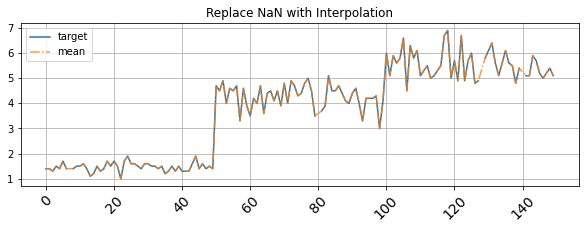

In [ ]:
# Replace missing values with interpolated value for that attribute(meaning its fit on a straight line)
plt.figure(figsize=(10,3))
plt.title('Replace NaN with Interpolation')
plt.plot(data['petal_length'], label='target')

vehicles = data['petal_length'].interpolate()

plt.plot(vehicles,ls='-.',alpha=0.8,label='mean')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

### Handlie by FFill -Forward Fill

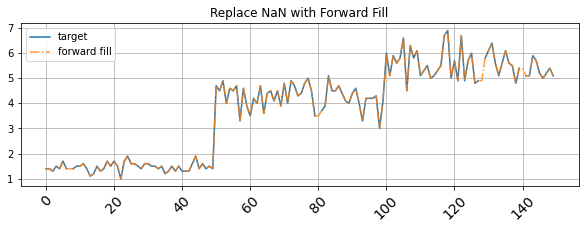

In [ ]:
# Replace missing values with previous valid value for that attribute
plt.figure(figsize=(10,3))
plt.title('Replace NaN with Forward Fill')
plt.plot(data['petal_length'], label='target')

vehicles = data['petal_length'].fillna(method='ffill')

plt.plot(vehicles,ls='-.',alpha=0.8,label='forward fill')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

### Handle Using Backward Fill

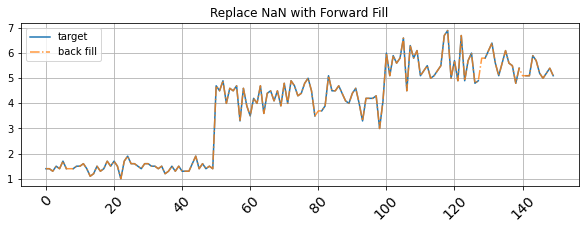

In [ ]:
# Replace missing values with previous valid value for that attribute
plt.figure(figsize=(10,3))
plt.title('Replace NaN with Forward Fill')
plt.plot(data['petal_length'], label='target')

vehicles = data['petal_length'].fillna(method='bfill')

plt.plot(vehicles,ls='-.',alpha=0.8,label='back fill')
plt.xticks(fontsize=14, rotation=45)
plt.legend()
plt.grid()

In [ ]:
group_class = data.groupby('class')

In [ ]:
# For each group, use group level averages to fill missing values
data['sepal_length'] = group_class['sepal_length'].transform(lambda x: x.fillna(x.mean()))
data['sepal_width'] = group_class['sepal_width'].transform(lambda x: x.fillna(x.mean()))
data['petal_length'] = group_class['petal_length'].transform(lambda x: x.fillna(x.mean()))
data['petal_width'] = group_class['petal_width'].transform(lambda x: x.fillna(x.mean()))

# Perfomance Evaluation

- Visually observe using Plots Residual Histograms Evaluate with Metrics like Root Mean Square Error (RMSE) While Plots are good for humans to visually observe the results, we often need a single metric that can indicate quality of a model. This can be useful for programmatically identifying which model is performing better (for example: using automatic model tuning to select the best performing model)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import os
import sys
from sklearn.metrics import mean_squared_error, mean_absolute_error

Read the Dataset

** Air Passengers Data
Columns¶
- Passengers = Actual Number of passengers who traveled by air
- Model1_Prediction = Number of Passengers predicted by model 1
- Model2_Prediction = Number of Passengers predicted by model 2
- Model3_Prediction = Number of Passengers predicted by model 3
- Model4_Prediction = Number of Passengers predicted by model 4
We are going to compare performance of these four models
How many passengers are going to travel by air this year?

## Read the Data

In [ ]:
# Use Local drives to upload the excel on google colab
from google.colab import files
uploaded = files.upload()

Saving airpassengers_sample.csv to airpassengers_sample.csv


In [ ]:
models = ['Model 1','Model 2', 'Model 3', 'Model 4']
df_air=pd.read_csv(io.BytesIO(uploaded['airpassengers_sample.csv']))
df_air

,Year,GDP,Population,Passengers,Model1_Prediction,Model2_Prediction,Model3_Prediction,Model4_Prediction
0,2008,14.72,304.09,701.78,710,701,850,750
1,2009,14.42,306.77,679.42,650,670,450,750
2,2010,14.96,309.34,720.50,700,715,1000,750
3,2011,15.52,311.64,730.80,750,735,550,750
4,2012,16.16,313.99,736.70,769,740,700,750
5,2013,16.69,316.23,743.17,800,740,900,750
6,2014,17.43,318.62,762.71,745,760,1100,750
7,2015,18.12,321.04,798.22,780,790,1200,750
8,2016,18.62,323.41,824.04,800,825,1500,750
9,2017,19.39,325.72,849.40,875,855,1600,750


## Plot Data
### Compare performance visually

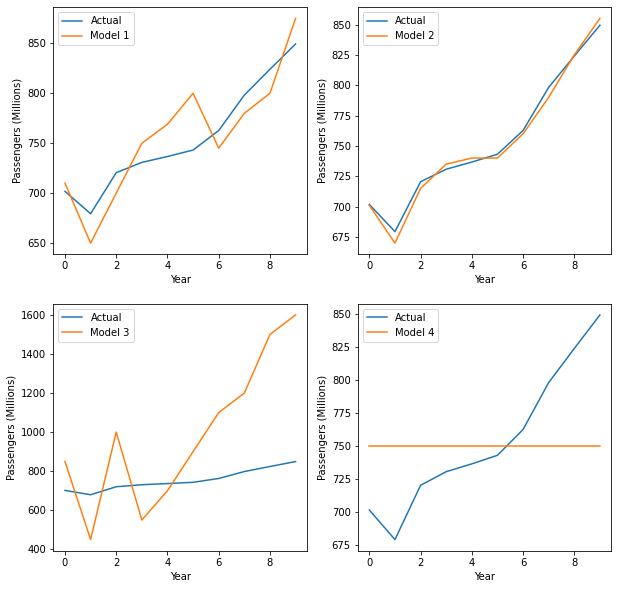

In [ ]:
plt.figure(figsize=(10,10))

# Plot Actual versus predictions by each model
# We are going to draw 4 plots in a 2 x 2 grid
# 221 = 2 rows, 2 columns, 1st sub plot
# 222 = 2 rows, 2 columns, 2nd sub plot
# and so forth

# Model 1
plt.subplot(221)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model1_Prediction'],label='Model 1')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 2
plt.subplot(222)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model2_Prediction'],label='Model 2')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 3
plt.subplot(223)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model3_Prediction'],label='Model 3')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

# Model 4
plt.subplot(224)
plt.plot(df_air['Passengers'], label='Actual')
plt.plot(df_air['Model4_Prediction'],label='Model 4')
plt.xlabel('Year')
plt.ylabel('Passengers (Millions)')
plt.legend()

plt.show()

- From the plots, we can observe that Model 1 and Model 2 appears to be pretty close to actuals. Model 3 plot is not matching with actuals. Model 4 is predicting a constant value

## Root Mean Square Error (RMSE)
- Compares Actual and Predicted values and arrives at a single metric. Smaller RMSE value indicates better predictive quality. Let's compute the RMSE metric for each of the models

In [ ]:
# RMSE
for model in models:
    print (model)
    mse = mean_squared_error(df_air['Passengers'], 
                             df_air[model.replace(' ','') + '_Prediction'])
    print(" Mean Squared Error: {0:.2f}".format(mse))
    print(" Root Mean Square Error: {0:.2f}".format(mse**.5))

Model 1
 Mean Squared Error: 787.38
 Root Mean Square Error: 28.06
Model 2
 Mean Squared Error: 26.54
 Root Mean Square Error: 5.15
Model 3
 Mean Squared Error: 150686.81
 Root Mean Square Error: 388.18
Model 4
 Mean Squared Error: 2661.81
 Root Mean Square Error: 51.59


- We can confirm using RMSE that Model 2 produces best outcome

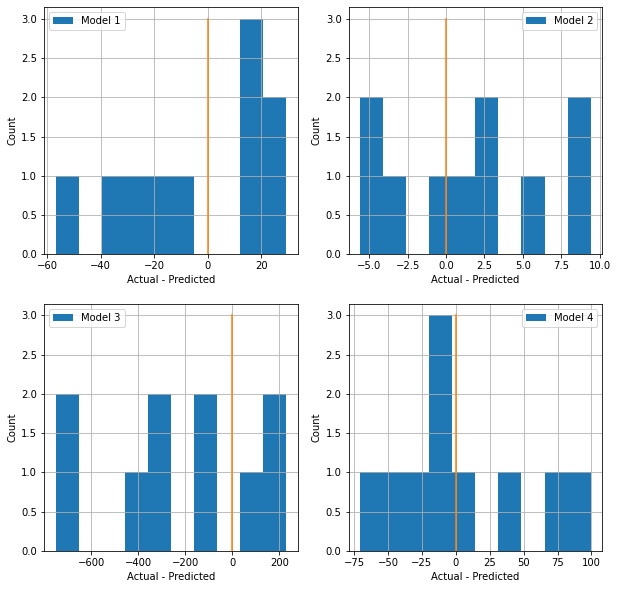

In [ ]:
plt.figure(figsize=(10,10))

for idx, model in enumerate(models):
    plt.subplot(2,2,idx+1)
    residual = df_air['Passengers'] - df_air[model.replace(' ','') + '_Prediction']
        
    plt.hist(residual,
             label=model)
    plt.plot([0,0],[0,3])
    plt.xlabel('Actual - Predicted')
    plt.ylabel('Count')
    plt.grid()
    plt.legend()

- Model 2 gives a better performance than the other models